In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from glob import glob

In [3]:
images = glob('images/*.jpg')

In [4]:
images

['images\\0.jpg',
 'images\\1.jpg',
 'images\\10.jpg',
 'images\\100.jpg',
 'images\\1000.jpg',
 'images\\10000.jpg',
 'images\\10001.jpg',
 'images\\10002.jpg',
 'images\\10003.jpg',
 'images\\10004.jpg',
 'images\\10005.jpg',
 'images\\10006.jpg',
 'images\\10007.jpg',
 'images\\10008.jpg',
 'images\\10009.jpg',
 'images\\1001.jpg',
 'images\\10010.jpg',
 'images\\10011.jpg',
 'images\\10012.jpg',
 'images\\10013.jpg',
 'images\\10014.jpg',
 'images\\10015.jpg',
 'images\\10016.jpg',
 'images\\10017.jpg',
 'images\\10018.jpg',
 'images\\10019.jpg',
 'images\\1002.jpg',
 'images\\10020.jpg',
 'images\\10021.jpg',
 'images\\10022.jpg',
 'images\\10023.jpg',
 'images\\10024.jpg',
 'images\\10025.jpg',
 'images\\10026.jpg',
 'images\\10027.jpg',
 'images\\10028.jpg',
 'images\\10029.jpg',
 'images\\1003.jpg',
 'images\\10030.jpg',
 'images\\10031.jpg',
 'images\\10032.jpg',
 'images\\10033.jpg',
 'images\\10034.jpg',
 'images\\10035.jpg',
 'images\\10036.jpg',
 'images\\10037.jpg',
 'ima

In [5]:
rng = np.random.RandomState()

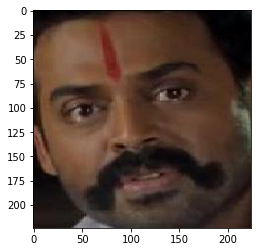

In [6]:
img_name = rng.choice(images)
img = plt.imread(img_name)
plt.imshow(img)

In [7]:
# Male vs Female classification ; 0 Female & 1 Male
data = pd.read_csv('train.csv')

In [8]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


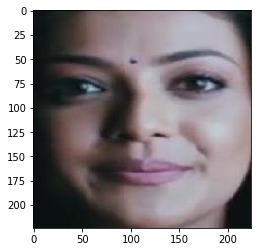

In [18]:
img = plt.imread('images/997.jpg')
plt.imshow(img)

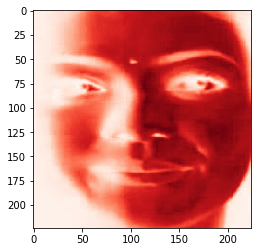

In [19]:
plt.imshow(img[:,:,0],cmap = 'Reds')

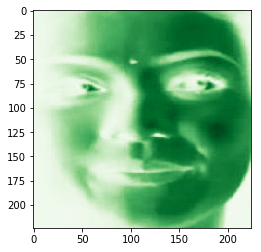

In [20]:
plt.imshow(img[:,:,1],cmap = 'Greens')

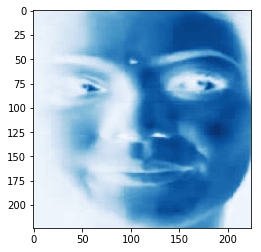

In [21]:
plt.imshow(img[:,:,2],cmap = 'Blues')

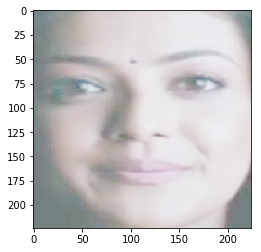

In [23]:
from skimage.exposure import adjust_gamma
plt.imshow(adjust_gamma(img,0.25))

In [25]:
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

This is a picture of Female


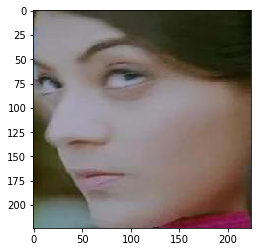

In [29]:
#Ra ndomly select an image and see the class if this is Male or Female image

row_index = rng.choice(data.index)
img_name = data.iloc[row_index]['image_names']
img = plt.imread('images/' + img_name)
plt.imshow(img)
target = data.iloc[row_index]['class']
if target == 1 :
    print("This is a picture of Male")
else:
    print("This is a picture of Female")

# Builing the Male Female Classification Model using keras

In [30]:
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [31]:
seed = 42
rng =np.random.RandomState(seed)

In [33]:
data = pd.read_csv('train.csv')
data.head(3)

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0


In [44]:
X = []
for image_mames in data.image_names :
    img = plt.imread('images/' + img_name)
    X.append(img)

X = np.array(X)
y = data['class'].values
    

In [47]:
X.shape

(12196, 150528)

In [45]:
X =X.reshape(12196,224*224*3)

In [58]:
X = X / X.max()

MemoryError: 

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size =0.3,random_state = seed)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim = 224*224*3,activation = 'sigmoid'))
model.add(Dense(units=1,activation ='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer ='sgd',metrics =['accuracy'])

In [ ]:
model.summary()